In [1]:
%run run_test.py

  0%|          | 0/40 [00:00<?, ?it/s]

In [2]:
import sys
sys.path.insert(1, '../src')

# fmt: off

from scipy.stats import weibull_min, norm
from models import WeibullModelExp, GaussianModel, Model
from em import EM
import utils
from utils import *
from distribution import Distribution
import seaborn as sns
from typing import NamedTuple
import numpy as np
import time
from multiprocessing import Pool
import matplotlib.pyplot as plt
import random
import pandas as pd

# fmt: on

In [3]:
import pickle
from run_test import *

with open('results.pkl', 'rb') as f:
    results: list[TestResult] = pickle.load(f)

         name                                    params  prior_probability
0  WeibullExp  (14.583885913901286, 0.8652944080971162)                1.0
samples count: 50
time         : 0.043
steps        : 2 / 16
error        : None


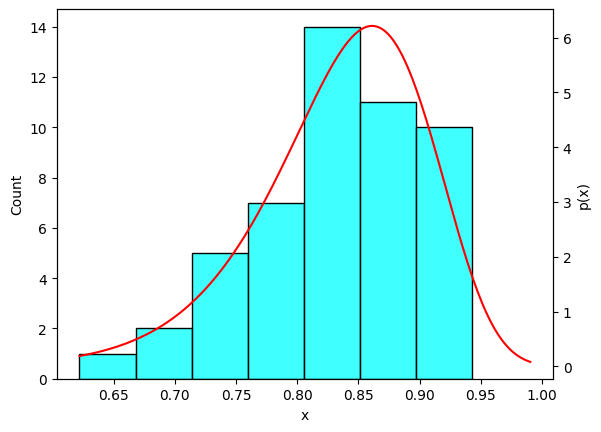



         name                                   params  prior_probability
0  WeibullExp  (14.982306334305918, 0.860731760631733)                1.0
samples count: 100
time         : 0.089
steps        : 2 / 16
error        : None


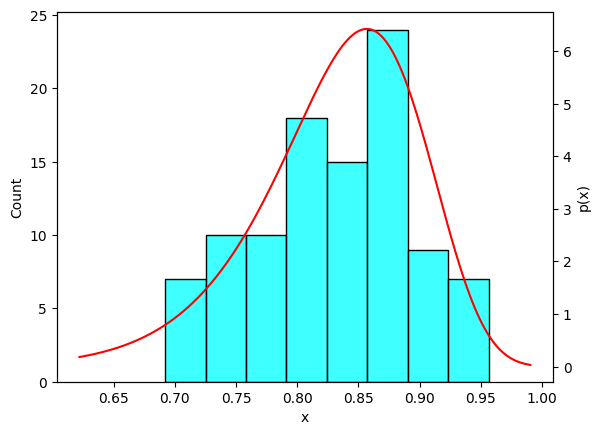



         name                                   params  prior_probability
0  WeibullExp  (17.07048739292982, 0.8682069823502298)                1.0
samples count: 200
time         : 0.147
steps        : 2 / 16
error        : None


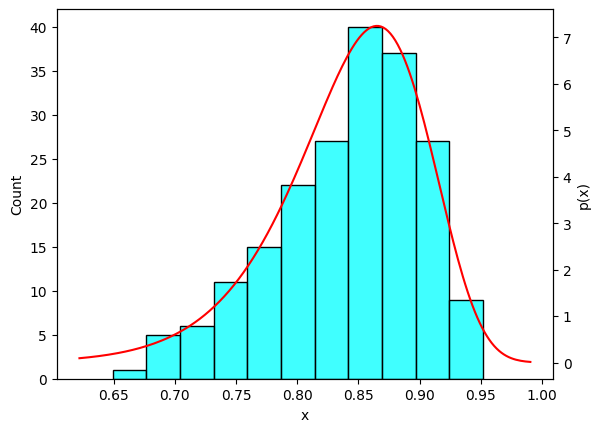



         name                                   params  prior_probability
0  WeibullExp  (15.56005299072189, 0.8646070398086182)                1.0
samples count: 500
time         : 0.312
steps        : 2 / 16
error        : None


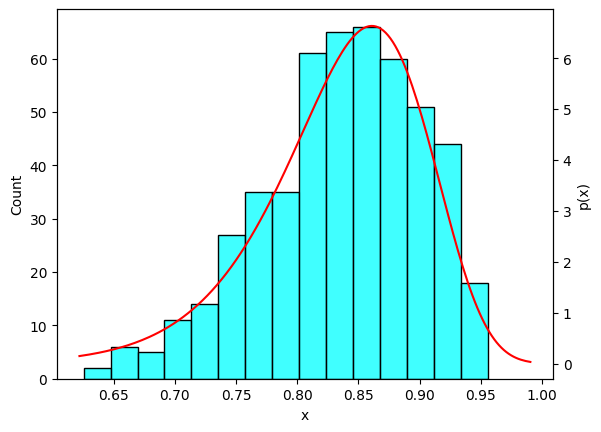



         name                                    params  prior_probability
0  WeibullExp  (3.7459403284804385, 1.7523110334580965)           0.439998
1  WeibullExp   (8.109588007311375, 11.972185107277292)           0.560002
samples count: 50
time         : 0.174
steps        : 4 / 16
error        : None


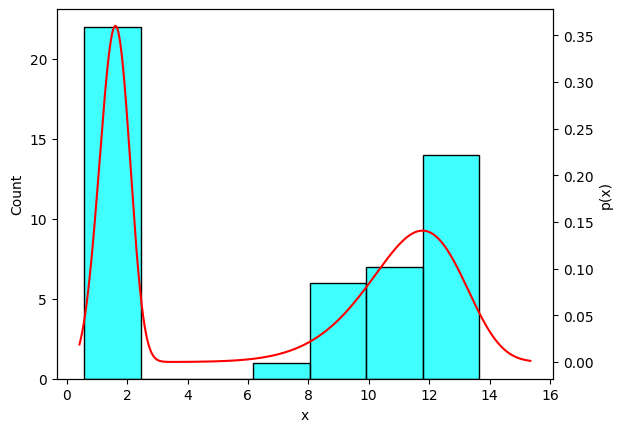



         name                                    params  prior_probability
0  WeibullExp   (4.064537863566914, 1.7963656671288943)               0.55
1  WeibullExp  (10.661524838459867, 12.301630139818016)               0.45
samples count: 100
time         : 0.111
steps        : 2 / 16
error        : None


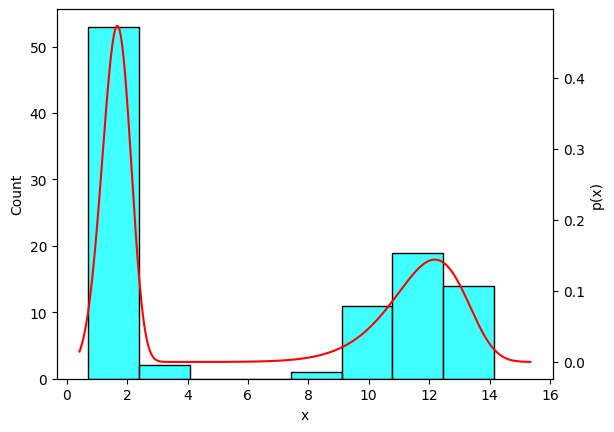



         name                                   params  prior_probability
0  WeibullExp  (4.324347936771127, 1.7755308354967907)            0.48499
1  WeibullExp  (7.571770907466523, 11.848016008009624)            0.51501
samples count: 200
time         : 0.222
steps        : 2 / 16
error        : None


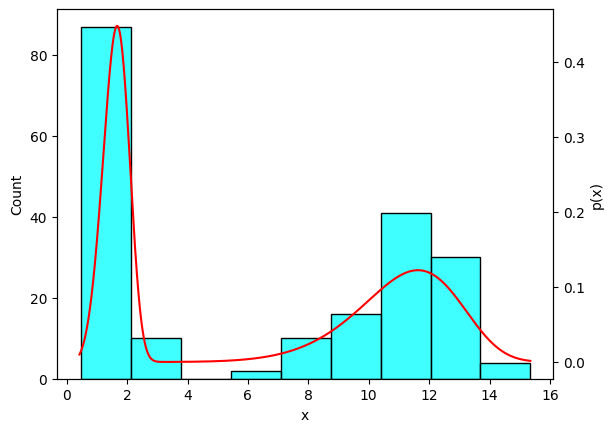



         name                                   params  prior_probability
0  WeibullExp  (3.933486604347201, 1.7992204963375682)           0.517991
1  WeibullExp  (7.742198923458812, 12.053085196757639)           0.482009
samples count: 500
time         : 1.887
steps        : 7 / 16
error        : None


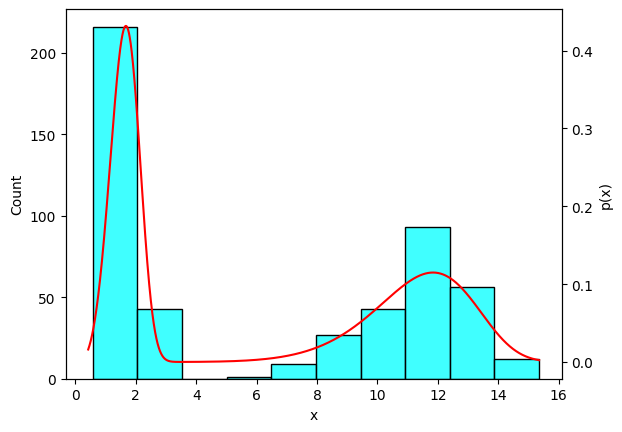



         name                                   params  prior_probability
0  WeibullExp   (1.922927374174793, 2.084631588257162)           0.276983
1  WeibullExp  (2.545530339607006, 11.231660696857702)           0.466321
2  WeibullExp  (34.05336626777554, 18.183716058475422)           0.256697
samples count: 50
time         : 0.722
steps        : 16 / 16
error        : None


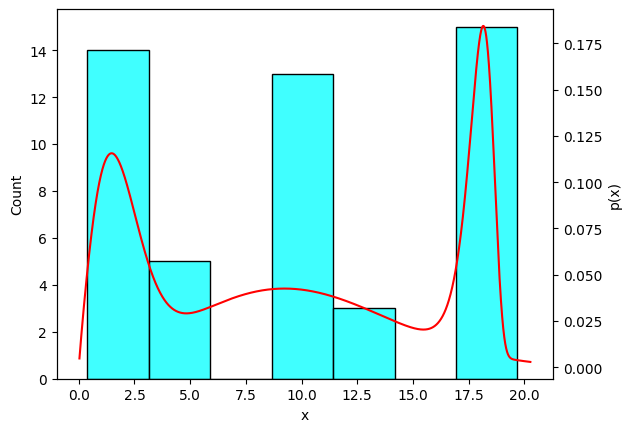



         name                                     params  prior_probability
0  WeibullExp    (2.6316547175001594, 2.926431053691037)           0.471019
1  WeibullExp  (107.12905184325379, 0.02804910577498667)           0.010000
2  WeibullExp    (3.787494284842725, 14.897362103612858)           0.518981
samples count: 100
time         : 8.099
steps        : 7 / 16
error        : None


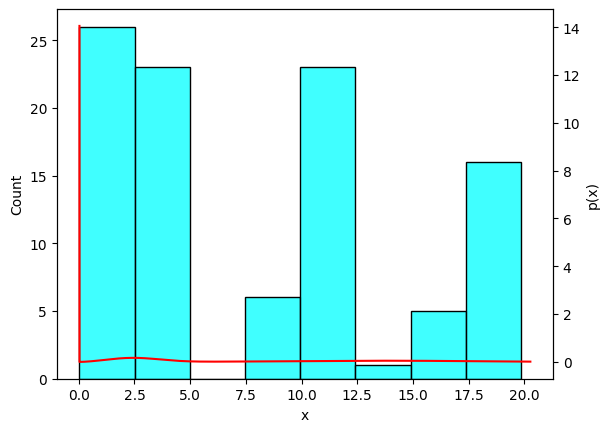



         name                                    params  prior_probability
0  WeibullExp  (4.1269698324715804, 15.327424335848217)           0.629895
1  WeibullExp   (2.3677402084339096, 2.645406518531071)           0.335914
2  WeibullExp    (9.897258854534378, 1.864234914555644)           0.034191
samples count: 200
time         : 2.548
steps        : 16 / 16
error        : None


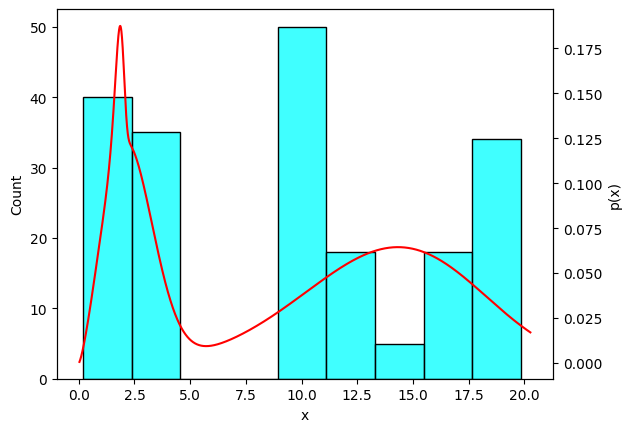



         name                                    params  prior_probability
0  WeibullExp   (1.4346051606628953, 7.935048136391173)           0.729749
1  WeibullExp  (19.294011080699732, 18.265071322465566)           0.188260
2  WeibullExp    (25.73938440687099, 18.73197935604283)           0.081991
samples count: 500
time         : 6.175
steps        : 16 / 16
error        : None


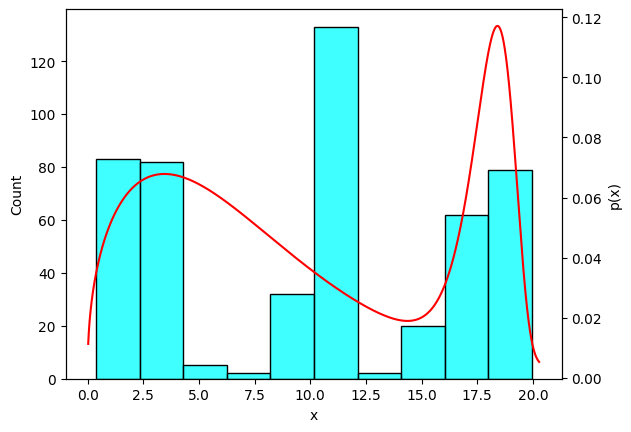



         name                                    params  prior_probability
0  WeibullExp   (22.00782147591545, 21.245717239278825)                NaN
1  WeibullExp             (inf, 5.958595534602544e-156)                NaN
2  WeibullExp  (10.530204715784144, 17.871943613463237)                NaN
3  WeibullExp   (20.902798330572526, 2.178900527797162)                NaN
samples count: 50
time         : 0.426
steps        : 6 / 16
error        : All models can't match due prior probability


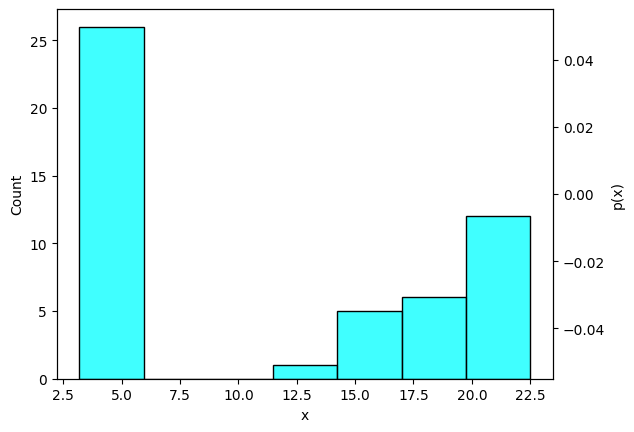



         name                                   params  prior_probability
0  WeibullExp  (8.988295931742549, 19.725704044680395)           0.470001
1  WeibullExp  (17.19829911458054, 4.2279051100046345)           0.370298
2  WeibullExp   (318.7812217392979, 4.523240639318767)           0.047200
3  WeibullExp    (27.57370859838459, 4.43875165467352)           0.112501
samples count: 100
time         : 1.449
steps        : 12 / 16
error        : None


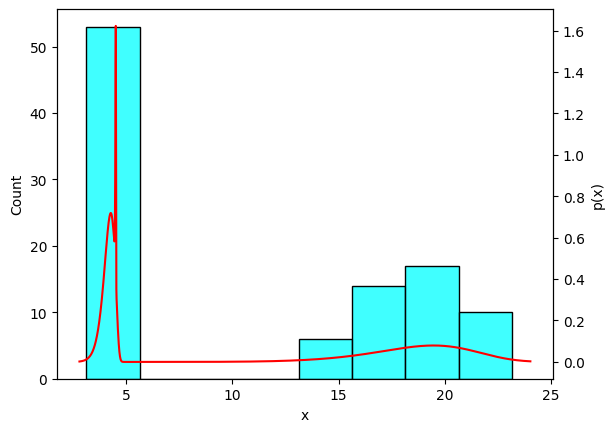



         name                                   params  prior_probability
0  WeibullExp    (20.545845039737603, 4.0858936851072)           0.329046
1  WeibullExp  (36.19968957548909, 12.717917634538642)           0.017549
2  WeibullExp  (30.719720229521197, 4.506202194064771)           0.150953
3  WeibullExp   (12.244898483009484, 20.2444338016454)           0.502451
samples count: 200
time         : 3.980
steps        : 16 / 16
error        : None


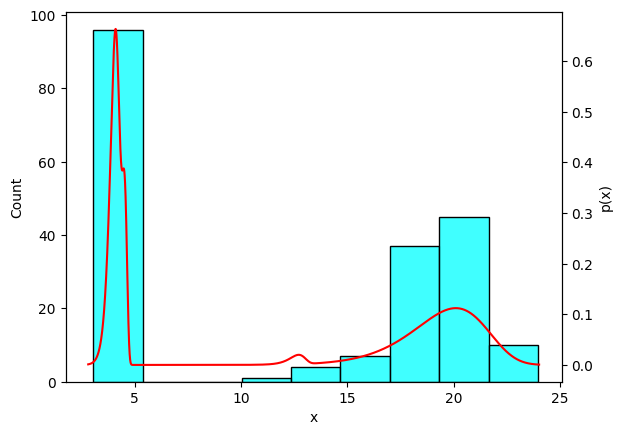



         name                                    params  prior_probability
0  WeibullExp  (15.318481227710176, 4.2496804707021045)           0.494000
1  WeibullExp  (13.266376963000187, 20.911935035228183)           0.214595
2  WeibullExp   (24.39230471199199, 11.377373050898145)           0.003604
3  WeibullExp   (10.112975976943588, 19.32928416078415)           0.287802
samples count: 500
time         : 5.655
steps        : 11 / 16
error        : None


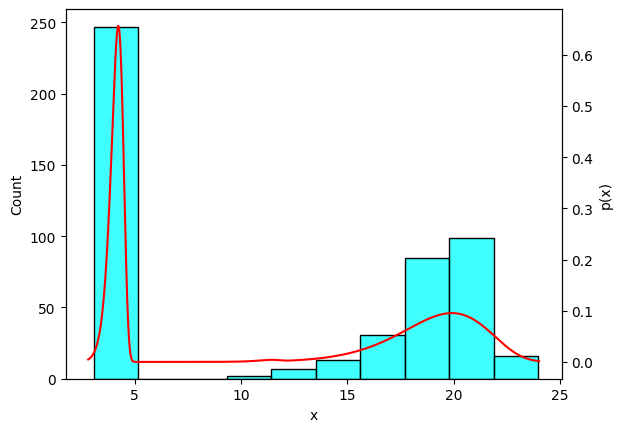



         name                                   params  prior_probability
0  WeibullExp   (27.77440457351158, 5.972879376787075)                NaN
1  WeibullExp  (19.724630018506907, 17.45645730348926)                NaN
2  WeibullExp  (19.724630018506907, 17.45645730348926)                NaN
3  WeibullExp  (2.018789399905264, 13.512967642754754)                NaN
4  WeibullExp                               (inf, 0.0)                NaN
samples count: 50
time         : 1.185
steps        : 13 / 16
error        : All models can't match due prior probability


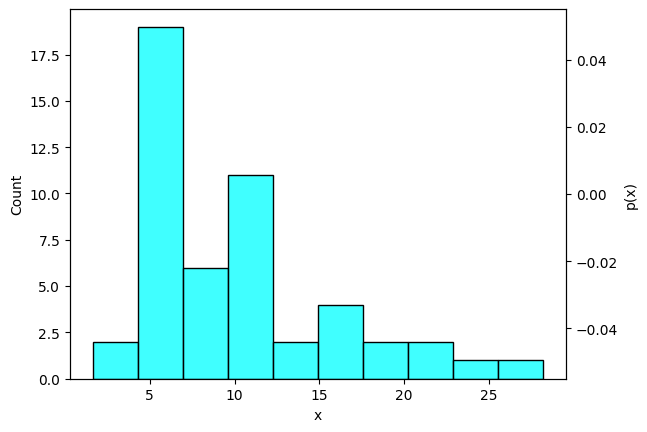



         name                                    params  prior_probability
0  WeibullExp   (7.119566324231986, 23.034660150311627)           0.013996
1  WeibullExp  (12.119480619094587, 26.500033082633074)           0.038627
2  WeibullExp    (2.60676791288919, 11.243162393575158)           0.860507
3  WeibullExp   (6.813019697995759, 18.575128339892455)           0.077195
4  WeibullExp   (175.90916071821582, 1.848686281103898)           0.009675
samples count: 100
time         : 18.453
steps        : 16 / 16
error        : None


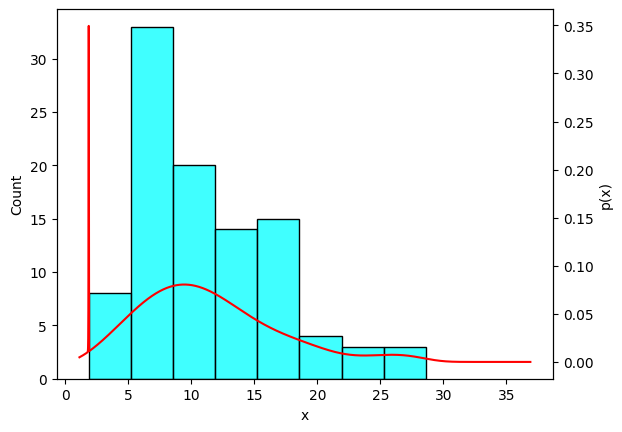



         name                                    params  prior_probability
0  WeibullExp  (9.550367142551352, 0.41381698015444496)                NaN
1  WeibullExp  (9.550367142551352, 0.41381698015444496)                NaN
2  WeibullExp  (9.550367142551352, 0.41381698015444496)                NaN
3  WeibullExp  (9.550367142551352, 0.41381698015444496)           0.077696
4  WeibullExp  (9.550367142551352, 0.41381698015444496)           0.922304
samples count: 200
time         : 2.388
steps        : 7 / 16
error        : All models can't match


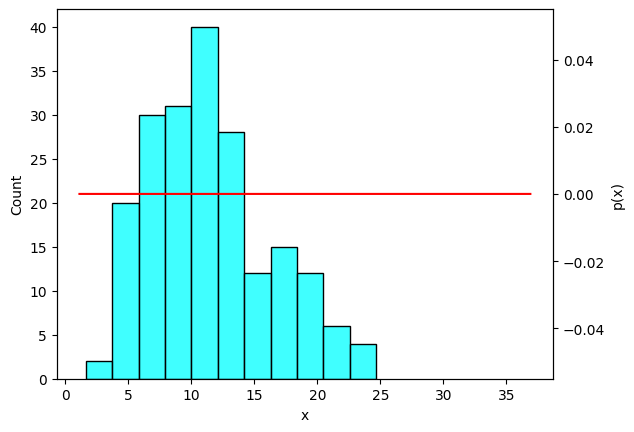



         name                                    params  prior_probability
0  WeibullExp  (49.295265533666935, 1.2635854880627748)                NaN
1  WeibullExp    (65.81745660724147, 1.263434684366183)                NaN
2  WeibullExp   (65.81745129315681, 1.2634346838220571)                NaN
3  WeibullExp   (65.81745593955533, 1.2634346878169254)           0.001659
4  WeibullExp   (79.19657020137547, 1.2633754502925663)           0.998341
samples count: 500
time         : 30.282
steps        : 10 / 16
error        : None


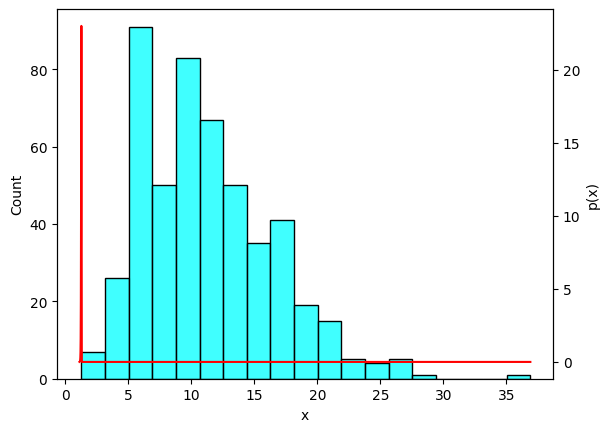



       name                                    params  prior_probability
0  Gaussian  (-17.21852634638116, 28.426240990272472)                1.0
samples count: 50
time         : 0.070
steps        : 2 / 16
error        : None


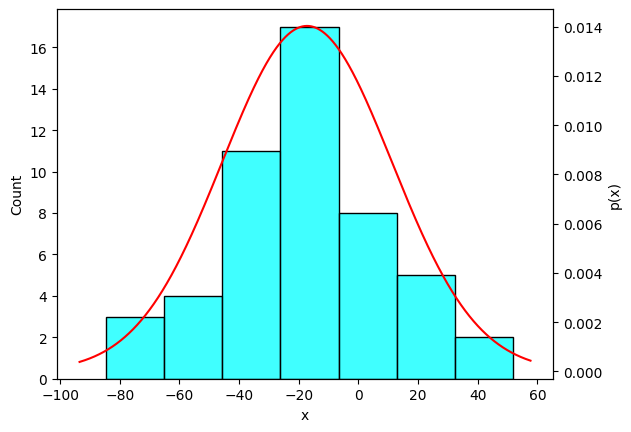



       name                                   params  prior_probability
0  Gaussian  (-14.81375836122647, 26.70582121375422)                1.0
samples count: 100
time         : 0.084
steps        : 2 / 16
error        : None


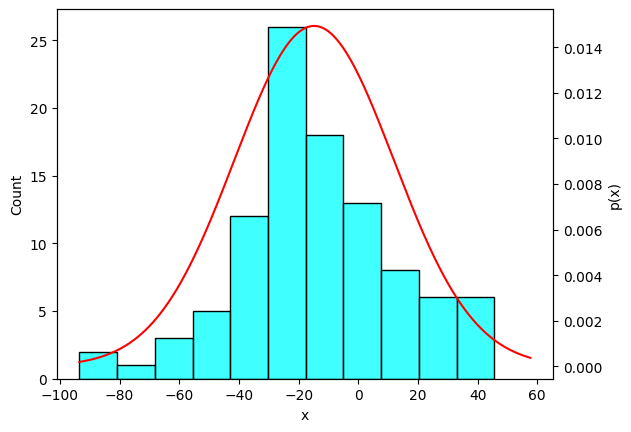



       name                                     params  prior_probability
0  Gaussian  (-15.726345785108318, 24.315723718802822)                1.0
samples count: 200
time         : 0.092
steps        : 2 / 16
error        : None


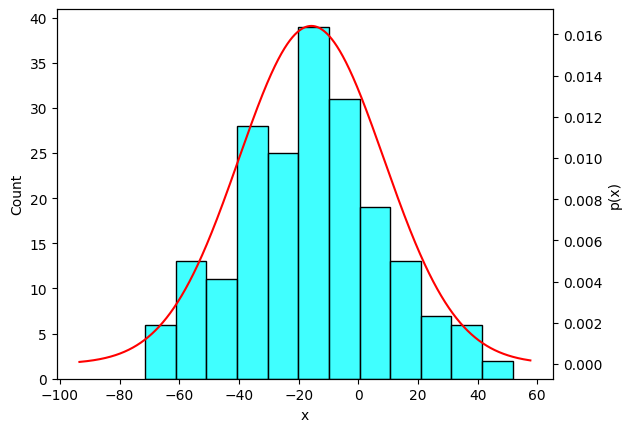



       name                                    params  prior_probability
0  Gaussian  (-15.174843114726679, 22.41370058236127)                1.0
samples count: 500
time         : 0.246
steps        : 2 / 16
error        : None


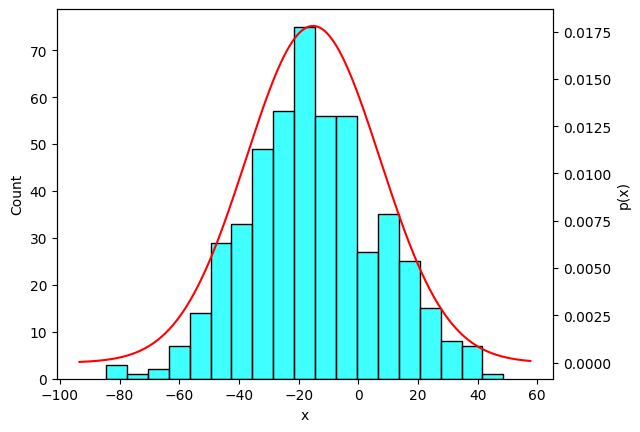



       name                                   params  prior_probability
0  Gaussian  (9.401892460520523, 11.022541906820246)           0.504786
1  Gaussian  (-18.00831395264665, 15.30893119378207)           0.495214
samples count: 50
time         : 0.495
steps        : 16 / 16
error        : None


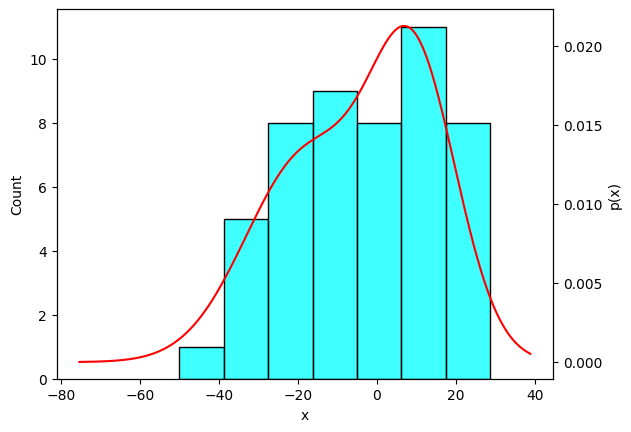



       name                                    params  prior_probability
0  Gaussian  (5.3724740545536385, 12.604438617258046)           0.735212
1  Gaussian   (-26.2840135458541, 14.836351709887051)           0.264788
samples count: 100
time         : 1.217
steps        : 16 / 16
error        : None


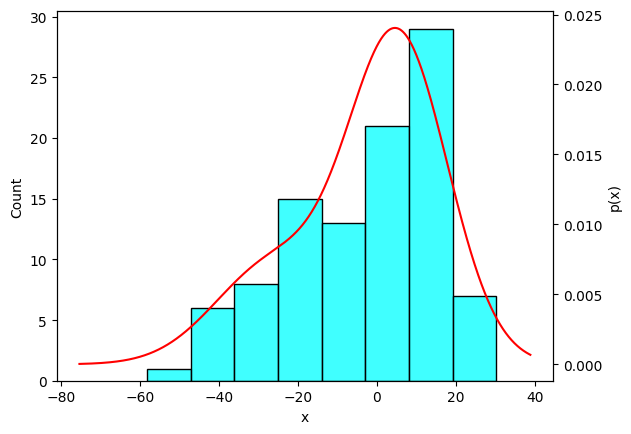



       name                                    params  prior_probability
0  Gaussian    (5.625080708937775, 9.306971401576067)            0.56704
1  Gaussian  (-20.55575333780426, 17.618160956318775)            0.43296
samples count: 200
time         : 1.458
steps        : 16 / 16
error        : None


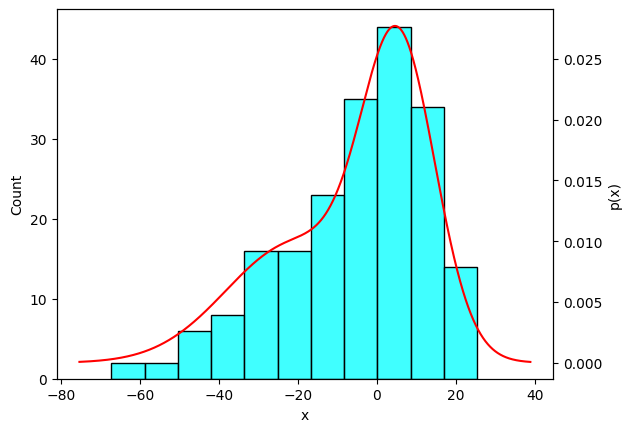



       name                                    params  prior_probability
0  Gaussian  (-13.631985412616196, 18.50558014924082)           0.515308
1  Gaussian   (7.9653302935059385, 9.989401397913047)           0.484692
samples count: 500
time         : 3.444
steps        : 16 / 16
error        : None


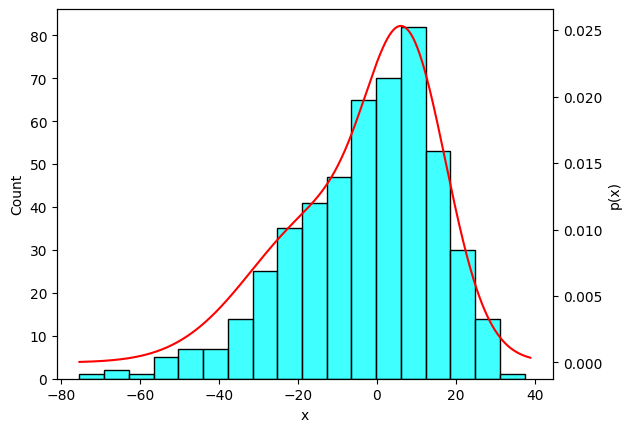



       name                                    params  prior_probability
0  Gaussian    (8.549442085021262, 18.97019237752909)           0.317692
1  Gaussian    (9.69098550756379, 4.6538357448920875)           0.295157
2  Gaussian  (-9.974753946520137, 11.110994914384603)           0.387152
samples count: 50
time         : 0.571
steps        : 16 / 16
error        : None


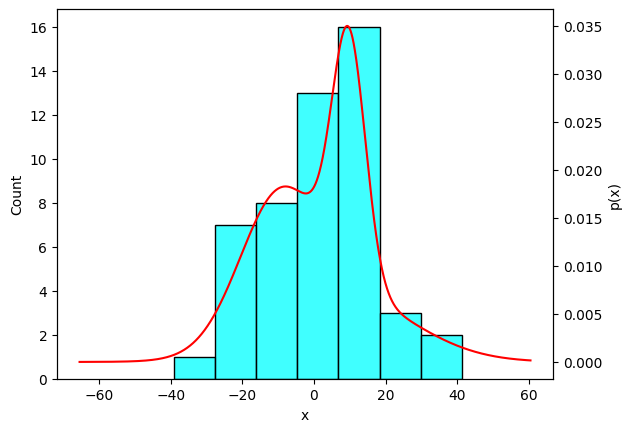



       name                                     params  prior_probability
0  Gaussian  (-25.484781837984077, 12.279511834656937)           0.069640
1  Gaussian  (-2.0297727919357396, 20.982305331077786)           0.542648
2  Gaussian      (7.577718403765156, 4.29125726607026)           0.387712
samples count: 100
time         : 1.248
steps        : 16 / 16
error        : None


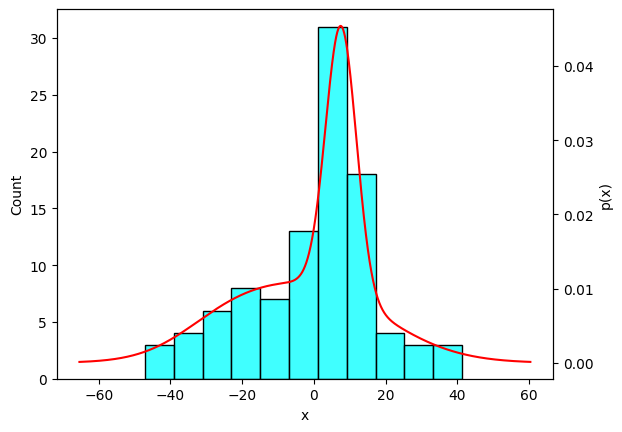



       name                                    params  prior_probability
0  Gaussian  (-8.846807867908995, 19.981721812344496)           0.439549
1  Gaussian   (9.525044625973647, 13.860504629839188)           0.525083
2  Gaussian  (-2.1198791052890567, 6.817767040848798)           0.035368
samples count: 200
time         : 2.578
steps        : 16 / 16
error        : None


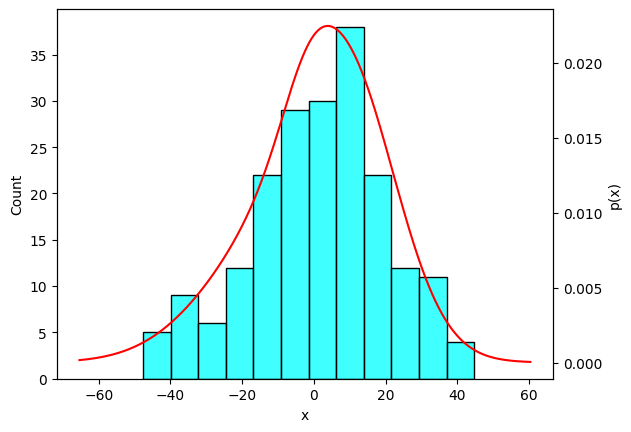



       name                                      params  prior_probability
0  Gaussian      (6.279921309639126, 5.924523912418384)           0.379320
1  Gaussian  (-0.21353110292842542, 23.113828600097968)           0.549892
2  Gaussian   (-14.801315899920397, 14.085967065368743)           0.070788
samples count: 500
time         : 5.769
steps        : 16 / 16
error        : None


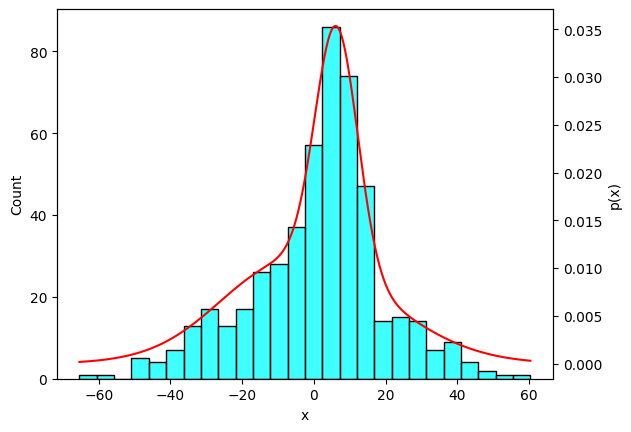



       name                                     params  prior_probability
0  Gaussian    (3.974368935048794, 10.766239643342384)           0.224704
1  Gaussian    (14.374509492024636, 7.815835666148049)           0.278402
2  Gaussian  (-15.238639795780085, 4.8183567797704026)           0.255265
3  Gaussian     (-6.190360274345949, 7.39525466114729)           0.241629
samples count: 50
time         : 0.833
steps        : 16 / 16
error        : None


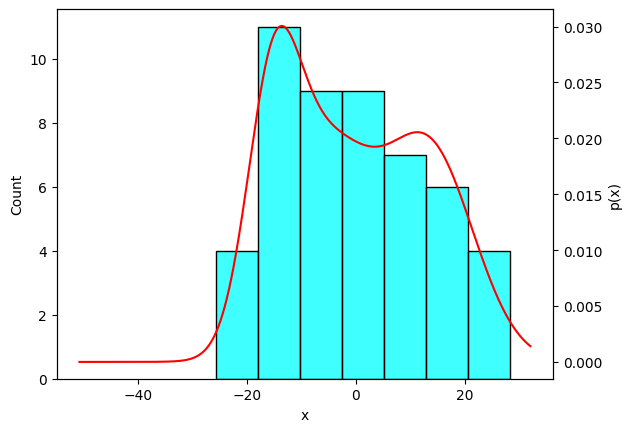



       name                                     params  prior_probability
0  Gaussian    (-14.09870954029614, 10.15033639133924)           0.438661
1  Gaussian    (11.926548640308862, 4.775743191310925)           0.263970
2  Gaussian  (-3.2226998353397973, 0.8142255787554302)           0.105571
3  Gaussian      (8.17116707620852, 5.703090343227089)           0.191798
samples count: 100
time         : 1.649
steps        : 16 / 16
error        : None


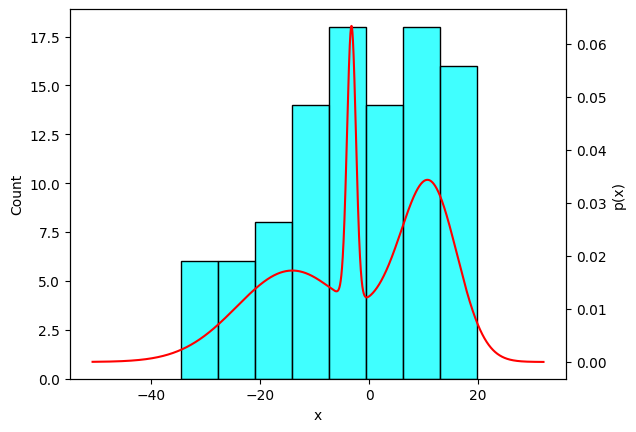



       name                                     params  prior_probability
0  Gaussian    (4.949540925759813, 10.073426475342789)           0.250452
1  Gaussian     (7.844164606161247, 8.722027197632817)           0.229839
2  Gaussian   (-13.566853259528639, 9.437993530267654)           0.293419
3  Gaussian  (-11.326905199575615, 14.407938579713308)           0.226290
samples count: 200
time         : 3.063
steps        : 16 / 16
error        : None


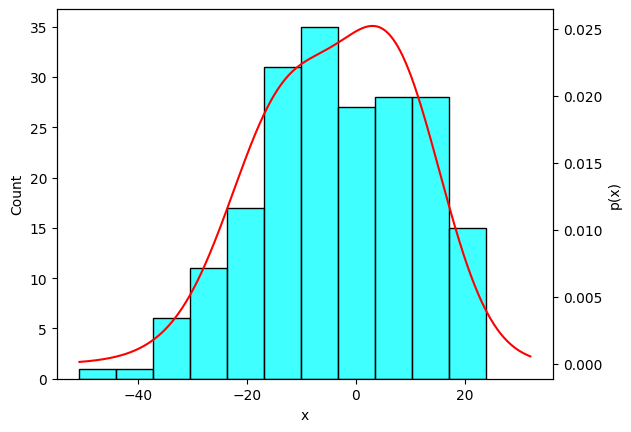



       name                                     params  prior_probability
0  Gaussian  (-3.2386635901260523, 0.5094712990361784)           0.028758
1  Gaussian    (11.102903059555592, 5.973669586432271)           0.183261
2  Gaussian    (-8.87451504580142, 13.228570846208141)           0.723982
3  Gaussian    (13.979144575483836, 2.943402555128463)           0.064000
samples count: 500
time         : 8.593
steps        : 16 / 16
error        : None


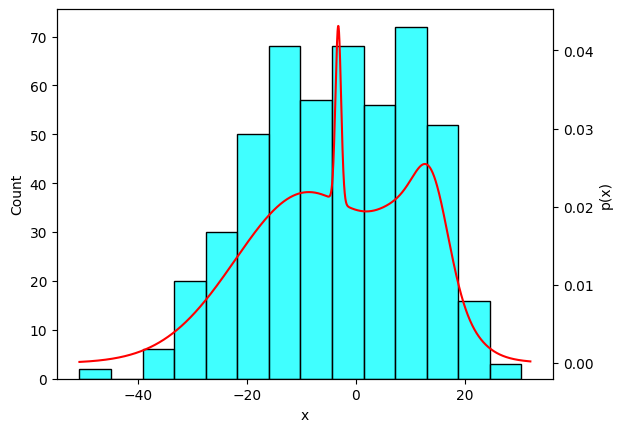



       name                                    params  prior_probability
0  Gaussian  (-14.964372003733557, 3.616063785804861)           0.251714
1  Gaussian   (-8.417106618493683, 17.30079548735682)           0.195344
2  Gaussian    (5.766645227619564, 12.77828924438146)           0.157453
3  Gaussian   (-9.36118419117622, 17.341392084183386)           0.198874
4  Gaussian  (-8.022615034396797, 17.196924776896058)           0.196615
samples count: 50
time         : 0.982
steps        : 16 / 16
error        : None


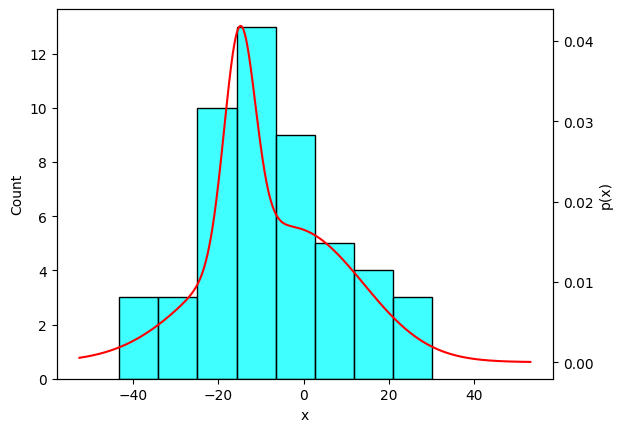



       name                                     params  prior_probability
0  Gaussian    (-13.53889915037771, 6.510423245570893)           0.339761
1  Gaussian    (12.720886195488468, 16.24269517714046)           0.122997
2  Gaussian  (-10.285693992242257, 16.329924599380043)           0.214738
3  Gaussian    (2.638244894030137, 3.4772169461126747)           0.147531
4  Gaussian      (5.453747283463424, 18.6142006994891)           0.174972
samples count: 100
time         : 2.012
steps        : 16 / 16
error        : None


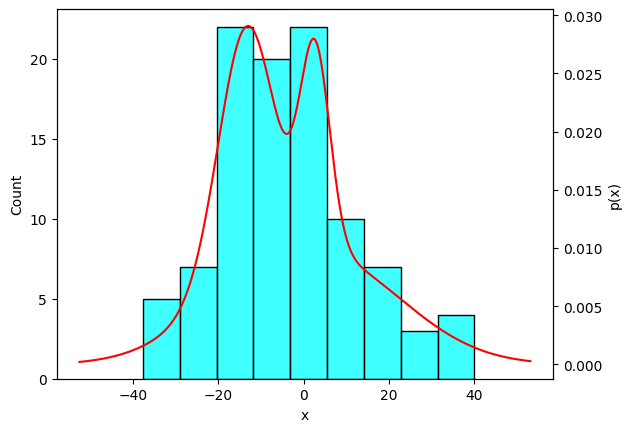



       name                                     params  prior_probability
0  Gaussian    (7.0954222324242515, 6.166109079239375)           0.093636
1  Gaussian   (-13.530806655241589, 6.824441922900146)           0.354349
2  Gaussian  (-1.0817238347472324, 21.302832391094594)           0.208564
3  Gaussian   (-10.332474371193573, 17.36377874372626)           0.223785
4  Gaussian    (11.934253461605003, 10.15342727152987)           0.119666
samples count: 200
time         : 3.231
steps        : 16 / 16
error        : None


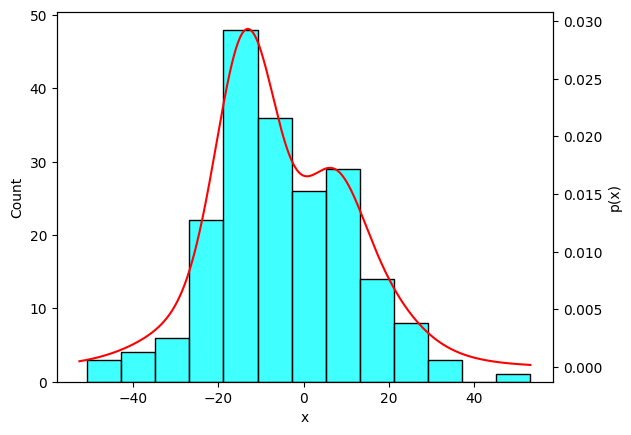



       name                                     params  prior_probability
0  Gaussian  (-13.414060474722517, 13.278860956586037)           0.259399
1  Gaussian   (1.3639706627696158, 17.046215542865603)           0.236338
2  Gaussian   (1.1351870047051889, 17.020895225322406)           0.224110
3  Gaussian     (6.573635982815556, 7.859338616764174)           0.040721
4  Gaussian   (-11.068806535735042, 7.708342861166842)           0.239431
samples count: 500
time         : 7.404
steps        : 16 / 16
error        : None


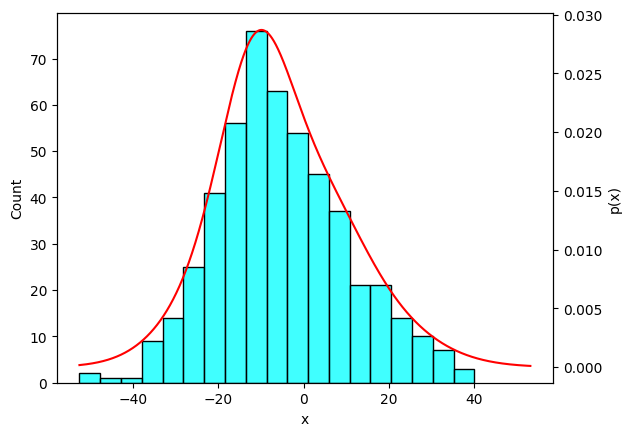

In [4]:
for result in results:

    table = [
        [
            d.model.name(),
            tuple(d.model.params_convert_from_model(d.params)),
            d.prior_probability
        ]
        for d in result.result.distributions
    ]
    df = pd.DataFrame(table, columns=["name", "params", "prior_probability"])
    print(df)
    print(f"samples count: {len(result.test.data)}")
    print(f"time         : {result.time:.3f}")
    print(f"steps        : {result.result.steps} / {result.test.max_step}")
    print(f"error        : {result.result.error}")

    fig, ax1 = plt.subplots()
    ax1.set_xlabel("x")

    sns.histplot(result.test.data, color="cyan")
    ax2 = ax1.twinx()
    ax2.set_ylabel("p(x)")

    min_data = min(result.test.base_data)
    max_data = max(result.test.base_data)

    def p(x):
        s = 0
        for d in result.result.distributions:
            if d.prior_probability is not None:
                s += d.prior_probability * d.model.p(x, d.params)
        return s

    X = list(np.linspace(min_data, max_data, int(np.abs(max_data - min_data) * 512)))
    Y = [p(x) for x in X]
    ax2.plot(X, Y, color="red")
    plt.show()
    print()
    print()